In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

根据算法 定义类

In [2]:
class My_lasso():

    def __init__(self):
        pass

    def train(self,X,Y,llambda,eps,mu,maxiter=10000):
        n = X.shape[0]
        p = X.shape[1]
        beta = np.zeros(p)
        # f_Beta=np.linalg.norm(Y-np.matmul(X,beta),ord=2)**2
        for i in range(maxiter):
            delta_f_beta = 2 * np.matmul(X.T, np.matmul(X, beta) - Y)
            beta_qta = beta - mu * delta_f_beta
            temp = 1 - llambda * mu / np.abs(beta_qta)
            beta_new = np.where(temp > 0, temp, 0) * beta_qta
            # print(beta)
            # print(beta_new)
            diff = np.linalg.norm(beta_new - beta, ord=1)
            #print(diff)
            if diff < eps:
                beta = beta_new
                break
            else:
                beta = beta_new
        self.beta=beta

    def predict(self,X):
        return X.dot(self.beta)
    
    def get_params(self):
        return self.beta

    

```temp = 1 - llambda * mu / np.abs(beta_qta)```

<font color=red size=4>这里可能会出现$\beta$为零出现在分母中的情况，推荐使用$$\beta^{t+1} = \left(|\tilde{\beta}^{t}|-\lambda \mu \right)_{+} sign(\tilde{\beta}^{t})$$</font>

读取数据

In [4]:
X,Y = load_boston(return_X_y = True)
scaler = preprocessing.StandardScaler(with_mean=False,with_std=True).fit(X)
X=scaler.transform(X)
Y=Y/np.std(Y)

交叉验证寻找最优参数

In [5]:
num_folds = 5
lambda_choices = 10**(-3+0.1*np.linspace(0,60,num=61))

X_train_folds = np.array_split(X, num_folds, axis=0)
y_train_folds = np.array_split(Y, num_folds, axis=0)

#lambda_to_mse = dict.fromkeys(lambda_choices, [])
lambda_to_mse={}

for lambda_choice in lambda_choices:

    mse_list=[]
    for fold in range(num_folds):

        Xtrain = np.concatenate(X_train_folds[:fold] + X_train_folds[fold + 1:])
        ytrain = np.concatenate(y_train_folds[:fold] + y_train_folds[fold + 1:])
        Xtest = X_train_folds[fold]
        ytest = y_train_folds[fold]

        model=My_lasso()
        model.train(Xtrain,ytrain,llambda=lambda_choice,eps=1e-5,mu=4e-6)
        yhat=model.predict(Xtest)
        RMSE=np.sqrt(np.linalg.norm(yhat-ytest,ord=2)**2/len(Xtest))
        mse_list.append(RMSE)
    lambda_to_mse[lambda_choice]=np.mean(mse_list)

print(lambda_to_mse)

{0.001: 0.5955772145497571, 0.0012589254117941675: 0.5955768284079261, 0.001584893192461114: 0.595576297660854, 0.001995262314968879: 0.5955756827449842, 0.0025118864315095794: 0.5955750069013551, 0.0031622776601683794: 0.595573990201111, 0.003981071705534973: 0.5955727656089003, 0.005011872336272725: 0.5955712777797172, 0.00630957344480193: 0.5955692941737525, 0.007943282347242814: 0.5955669046443702, 0.01: 0.5955638424850148, 0.012589254117941675: 0.5955600853176395, 0.01584893192461114: 0.5955552280709252, 0.0199526231496888: 0.5955491714265975, 0.025118864315095808: 0.5955415899190011, 0.03162277660168379: 0.5955321302638908, 0.039810717055349734: 0.59552117120007, 0.05011872336272725: 0.5955073908990224, 0.06309573444801933: 0.5954900519711079, 0.07943282347242818: 0.5954681772538624, 0.1: 0.5954407269591931, 0.12589254117941676: 0.5954063492769869, 0.15848931924611143: 0.5953630989319534, 0.19952623149688808: 0.59530913665368, 0.25118864315095824: 0.5952416840531178, 0.3162277660

In [6]:
for lam,mse in sorted(lambda_to_mse.items()):
    #for mse in lambda_to_mse[lam]:
    print('lam = %f, MSE = %f' % (lam, mse))

lam = 0.001000, MSE = 0.595577
lam = 0.001259, MSE = 0.595577
lam = 0.001585, MSE = 0.595576
lam = 0.001995, MSE = 0.595576
lam = 0.002512, MSE = 0.595575
lam = 0.003162, MSE = 0.595574
lam = 0.003981, MSE = 0.595573
lam = 0.005012, MSE = 0.595571
lam = 0.006310, MSE = 0.595569
lam = 0.007943, MSE = 0.595567
lam = 0.010000, MSE = 0.595564
lam = 0.012589, MSE = 0.595560
lam = 0.015849, MSE = 0.595555
lam = 0.019953, MSE = 0.595549
lam = 0.025119, MSE = 0.595542
lam = 0.031623, MSE = 0.595532
lam = 0.039811, MSE = 0.595521
lam = 0.050119, MSE = 0.595507
lam = 0.063096, MSE = 0.595490
lam = 0.079433, MSE = 0.595468
lam = 0.100000, MSE = 0.595441
lam = 0.125893, MSE = 0.595406
lam = 0.158489, MSE = 0.595363
lam = 0.199526, MSE = 0.595309
lam = 0.251189, MSE = 0.595242
lam = 0.316228, MSE = 0.595158
lam = 0.398107, MSE = 0.595054
lam = 0.501187, MSE = 0.594924
lam = 0.630957, MSE = 0.594762
lam = 0.794328, MSE = 0.594565
lam = 1.000000, MSE = 0.594328
lam = 1.258925, MSE = 0.594047
lam = 1.

找到最优的lambda

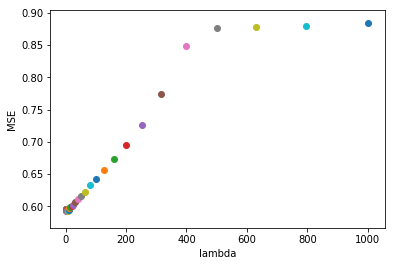

The best lambda is 3.981072


In [7]:
for lam in sorted(lambda_to_mse):
    plt.scatter(lam,lambda_to_mse[lam])
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.show()

lam=list(lambda_to_mse.keys())
mse=list(lambda_to_mse.values())
best_lambda=lam[ np.argmin(mse) ]

print("The best lambda is %f"%best_lambda)

以最优的lambda计算系数

In [10]:
model = My_lasso()
model.train(X,Y,llambda=best_lambda,eps=1e-5,mu=4e-6)
# yhat = model.predict(X)
# RMSE = np.sqrt(np.linalg.norm(yhat - Y, ord=2) ** 2 / len(X))
final_beta=model.get_params()

In [11]:
final_beta

array([-0.07536934,  0.10758255, -0.01210497,  0.07801817, -0.03257002,
        0.44687669, -0.01391372, -0.20090654,  0.10179273, -0.11347201,
       -0.09642793,  0.14015362, -0.33084993])

In [12]:
feature_name=['城市人均犯罪率',
                                            '占地面积超过 25,000 平方英尺的住宅用地比例',
                                            '每个城镇非零售业务的比例',
                                            'Charles River 虚拟变量（如果是河道，则为 1; 否则为 0） ',
                                            '一氧化氮浓度（每千万份） ',
                                            '每间住宅的平均房间数',
                                            '1940 年以前建造的自住单位比例 ',
                                            '加权距离波士顿的五个就业中心',
                                            '径向高速公路的可达性指数 ', 
                                            '每 10,000 美元的全额物业税率',
                                            '城镇的学生与教师比例 ',
                                            'B=1000(Bk −0.63)2 其中 Bk 是城镇黑人的比例 ',
                                            '人口状况下降 ']

In [14]:
for i,coef in enumerate(final_beta):
    if np.abs(coef)<0.1:
        print(feature_name[i],"系数接近0")

城市人均犯罪率 系数接近0
每个城镇非零售业务的比例 系数接近0
Charles River 虚拟变量（如果是河道，则为 1; 否则为 0）  系数接近0
一氧化氮浓度（每千万份）  系数接近0
1940 年以前建造的自住单位比例  系数接近0
城镇的学生与教师比例  系数接近0


可以看到，以上所述的变量系数接近0。这些变量与房价关系不强。